In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr
import itertools

In [2]:
df = pd.read_csv("heart1.csv")

In [3]:

col = ["age","sex","chest_pain","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","diagnosis"]

df.columns = col #assigning the column names

df_x = df.drop("diagnosis", axis = 1) #independent variables
df_y = df["diagnosis"] #target variables

In [4]:
df_x.sample(5)

,age,sex,chest_pain,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
192,58,0,2,136,319,1,2,152,0,0.0,1,2,3
13,53,1,3,130,246,1,2,173,0,0.0,1,3,3
114,67,1,4,125,254,1,0,163,0,0.2,2,2,7
17,50,1,3,140,233,0,0,163,0,0.6,2,1,7
120,40,1,1,140,199,0,0,178,1,1.4,1,0,7


In [5]:
df_y.sample(5)

97     1
3      0
202    1
208    1
94     0
Name: diagnosis, dtype: int64

In [6]:
df_y.unique()

array([0, 1], dtype=int64)

In [7]:
#lets see the percentage count for person with and without heart disease in our dataset
positive = len(df_y[df["diagnosis"]==1])/len(df_y)
negative = len(df_y[df["diagnosis"]==0])/len(df_y)

print("Positive = %0.2f , Negative = %0.2f" %(positive,negative))



Positive = 0.46 , Negative = 0.54


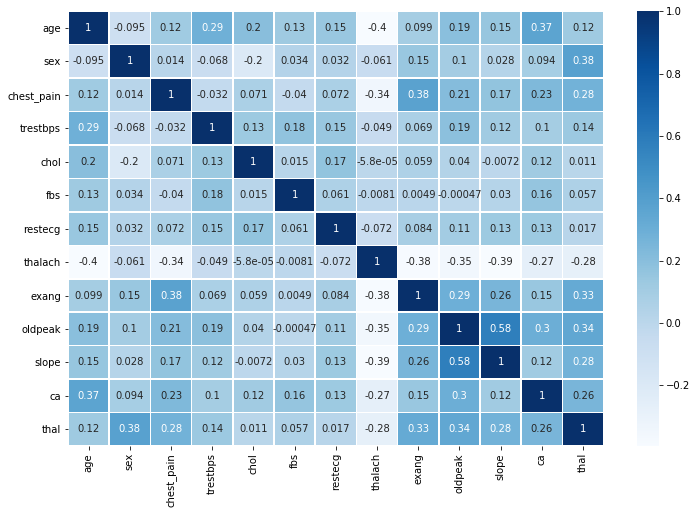

In [8]:
#lets view the correlation in feature dataset
plt.figure(figsize= (12,8))
sns.heatmap(df_x.corr(), cmap = "Blues", linewidth = '0.5', annot = True)


###  woowww! all the attributes seems independent


In [54]:
#lets select our model from random forest, logisticRegression, SVC and decision tree classifier

from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.linear_model import LogisticRegression as LR
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier as DTC

from sklearn.model_selection import GridSearchCV,train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix,accuracy_score


In [55]:
x_train,x_test,y_train,y_test = train_test_split(df_x,df_y, test_size = 0.2)
y_test1 = y_test.copy()

In [56]:
clf = RFC(n_estimators=10)
clf1 = LR()
clf2 = SVC()
clf3 = DTC()

In [57]:
clf.fit(x_train,y_train)
pred = clf.predict(x_test)

clf1.fit(x_train,y_train)
pred1 = clf1.predict(x_test)

clf2.fit(x_train,y_train)
pred2 = clf2.predict(x_test)

clf3.fit(x_train,y_train)
pred3 = clf3.predict(x_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [ ]:
pred = pred.astype(object)
for i, row in enumerate(pred):
    if row == 0:
        pred[i] = "Negative"
    else:
        pred[i] = "Positive"
        
pred1 = pred1.astype(object)
for i, row in enumerate(pred):
    if row == 0:
        pred1[i] = "Negative"
    else:
        pred1[i] = "Positive"

pred2 = pred2.astype(object)
for i, row in enumerate(pred):
    if row == 0:
        pred2[i] = "Negative"
    else:
        pred2[i] = "Positive"
        
        
y_test1 = pd.Series(y_test1)
#print(f"{y_test} ,{y_test.dtype}")
for index in y_test1.index:
    if y_test1[index] == 0:
        y_test1[index] = "Negative"
    else:
        y_test1[index] = "Positive"


Random Forest
Confusion matrix, without normalization


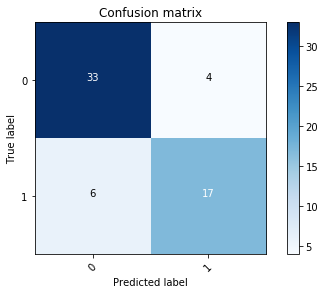

In [58]:
print("Random Forest")
cm = confusion_matrix(pred, y_test)

plot_confusion_matrix(cm,classes = [0,1])

logistic regression
Confusion matrix, without normalization


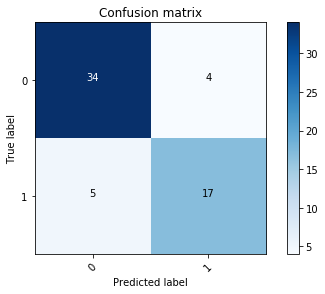

In [59]:
print("logistic regression")
cm = confusion_matrix(pred1, y_test)

plot_confusion_matrix(cm,classes = [0,1])

svm
Confusion matrix, without normalization


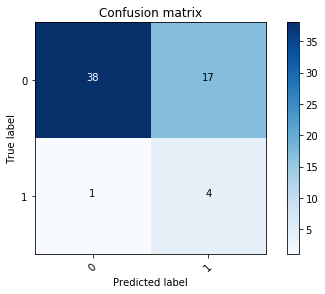

In [60]:
print("svm")
cm = confusion_matrix(pred2, y_test)

plot_confusion_matrix(cm,classes = [0,1])

Decison tree
Confusion matrix, without normalization


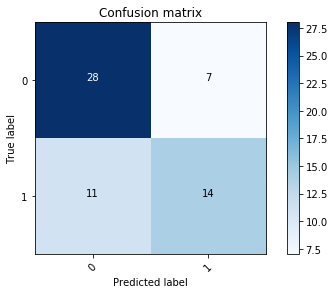

In [61]:
print("Decison tree")
cm = confusion_matrix(pred3, y_test)

plot_confusion_matrix(cm,classes = [0,1])

In [ ]:

for i,j in zip([pred,pred1,pred2,pred3],['random_forest','Logistic regression','SVM',"decision tree"]):
    print("\n\nconfusion matrix of ",j,":\n\n")
    print(pd.crosstab(i,y_test))


In [66]:
#lets see our model performance  without tunning the parameters then we will build our model on which ever parameter gives the best result
li = []
for classifier, label in zip([clf,clf1,clf2,clf3], ["Random Forest","LogisticRegression","SVM","decision tree"]):
    #calculating cross validation score
    score = cross_val_score(classifier,x_train,y_train, cv = 9, scoring = "accuracy")
    li.append(score.mean())
    #print(f"Accuracy from {label} is {score.mean()}")


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

<BarContainer object of 4 artists>

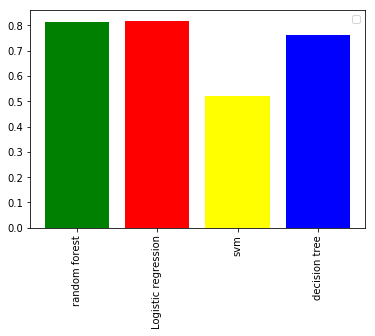

In [85]:
plt.legend("Accuracy for different models")
names = ['random forest', 'Logistic regression','svm', 'decision tree']
plt.xticks(rotation=90)
plt.bar(pd.Series(names),pd.Series(li),color=["green","red","yellow","blue"])

## lets perform gridsearch cross-validation for Random Forest to find the best model by tuning its hyperparameters

In [ ]:
param = {"max_depth":[5,10,15],
         "n_estimators":[10,15,20,25,30,40,50],
         "max_features":[2,3,4],
         "min_samples_leaf":[3,4,5],
         "min_samples_split":[2,3,4,5],
         "bootstrap":[True] }


grid = GridSearchCV(estimator = clf, param_grid = param, cv = 7, verbose = 3)

grid.fit(x_train,y_train)

cv_keys = ("mean_test_score","std_test_score","params")

for k,_ in enumerate(grid.cv_results_["mean_test_score"]):
    print(f"{grid.cv_results_[cv_keys[0]][k]} , {grid.cv_results_[cv_keys[1]][k]}, {grid.cv_results_[cv_keys[2]][k]}")


In [ ]:

print(f"Best score : {grid.best_score_}")
print(f"Best Param : {grid.best_params_}")


In [63]:

clf = RFC(bootstrap= True, max_depth= 5, max_features= 3, min_samples_leaf= 4, min_samples_split= 4, n_estimators=25)
clf.fit(x_train,y_train)
pred = clf.predict(x_test)

accuracy = accuracy_score(pred,y_test)

print(f"Accuracy on Test dataset = {round(accuracy,2)}")


Accuracy on Test dataset = 0.83


### Confusion Matrix for randomforest after hyper tuning

Random Forest
Confusion matrix, without normalization


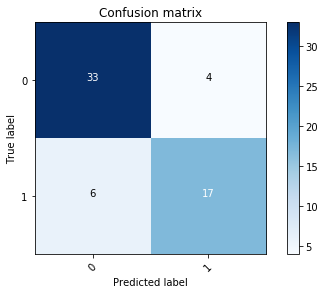

In [64]:
print("Random Forest")
cm = confusion_matrix(pred, y_test)

plot_confusion_matrix(cm,classes = [0,1])

In [10]:
def plot_confusion_matrix(cm, classes,
                                      normalize=False,
                                      title='Confusion matrix',
                                      cmap=plt.cm.Blues):
                """
                See full source and example:
                http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

                This function prints and plots the confusion matrix.
                Normalization can be applied by setting `normalize=True`.
                """
                plt.imshow(cm, interpolation='nearest', cmap=cmap)
                plt.title(title)
                plt.colorbar()
                tick_marks = np.arange(len(classes))
                plt.xticks(tick_marks, classes, rotation=45)
                plt.yticks(tick_marks, classes)

                if normalize:
                    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
                    print("Normalized confusion matrix")
                else:
                    print('Confusion matrix, without normalization')

                thresh = cm.max() / 2.
                for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
                    plt.text(j, i, cm[i, j],
                             horizontalalignment="center",
                             color="white" if cm[i, j] > thresh else "black")

                plt.tight_layout()
                plt.ylabel('True label')
                plt.xlabel('Predicted label')
                plt.show()


In [12]:
# assigning labels to "y_test" and "pred"

